In [2]:
import numpy as np
from numpy.random import default_rng

import matplotlib.pyplot as plt

## 1 z-Potential

In [3]:
# original function
def fzpot(r):
    x = r[0]
    y = r[1]
    f = (
        5.0 * np.exp(-0.2 * (x + 3.0 * (y + 3.0)) ** 2) / (1.0 + np.exp(x - 3.0))
        + 5.0 * np.exp(-0.2 * (x + 3.0 * (y - 3.0)) ** 2) / (1.0 + np.exp(-x - 3.0))
        - 3.0 * np.exp(-0.01 * (x + 5.0) ** 2 - 0.2 * (y + 5) ** 2)
        - 3.0 * np.exp(-0.01 * (x - 5.0) ** 2 - 0.2 * (y - 5) ** 2)
        + 3.0 * np.exp(-0.01 * (x**2 + y**2))
        + (x**4 + y**4) / 20480.0
    )

    return f


# derivative in x
def fzpot_dx(r):
    x = r[0]
    y = r[1]
    f = (
        5.0
        * np.exp(-3.0 - x - 0.2 * (x + 3.0 * (y - 3.0)) ** 2)
        / (1.0 + np.exp(-3.0 - x)) ** 2
        - 5.0
        * np.exp(-3.0 + x - 0.2 * (x + 3.0 * (y + 3.0)) ** 2)
        / (1.0 + np.exp(-3.0 + x)) ** 2
        - 2.0
        * np.exp(-0.2 * (x + 3.0 * (y - 3.0)) ** 2)
        * (x + 3.0 * (y - 3.0))
        / (1 + np.exp(-3.0 - x))
        - 2.0
        * np.exp(-0.2 * (x + 3.0 * (y + 3.0)) ** 2)
        * (x + 3.0 * (y + 3.0))
        / (1 + np.exp(-3.0 + x))
        + 0.06 * np.exp(-0.01 * (x - 5.0) ** 2 - 0.2 * (y - 5.0) ** 2) * (x - 5.0)
        + 0.06 * np.exp(-0.01 * (x + 5.0) ** 2 - 0.2 * (y + 5.0) ** 2) * (x + 5.0)
        - 0.06 * np.exp(-0.01 * (x**2 + y**2)) * x
        + x**3 / 5120
    )

    return f


# derivative in y
def fzpot_dy(r):
    x = r[0]
    y = r[1]
    f = (
        -6.0
        * np.exp(-0.2 * (x + 3.0 * (y - 3.0)) ** 2)
        * (x + 3.0 * (y - 3.0))
        / (1.0 + np.exp(-3.0 - x))
        - 6.0
        * np.exp(-0.2 * (x + 3.0 * (y + 3.0)) ** 2)
        * (x + 3.0 * (y + 3.0))
        / (1.0 + np.exp(-3.0 + x))
        + 1.2 * np.exp(-0.01 * (x - 5.0) ** 2 - 0.2 * (y - 5.0) ** 2) * (y - 5.0)
        + 1.2 * np.exp(-0.01 * (x + 5.0) ** 2 - 0.2 * (y + 5.0) ** 2) * (y + 5.0)
        - 0.06 * np.exp(-0.01 * (x**2 + y**2)) * y
        + y**3 / 5120
    )

    return f


# integrate along x
def fzpot_intx(y):
    x = np.linspace(-15, 15, 301)
    dx = 0.1
    fx = fzpot([x, y])

    fxint = np.trapz(fx, dx=dx)

    return fxint


# integrate along y
def fzpot_inty(x):
    y = np.linspace(-10, 10, 201)
    dy = 0.1
    fy = fzpot([x, y])

    fyint = np.trapz(fy, dx=dy)

    return fyint

### 1.1 Visualizing the potential and its derivatives

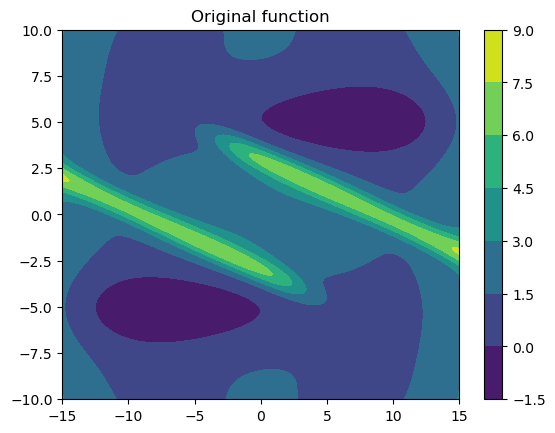

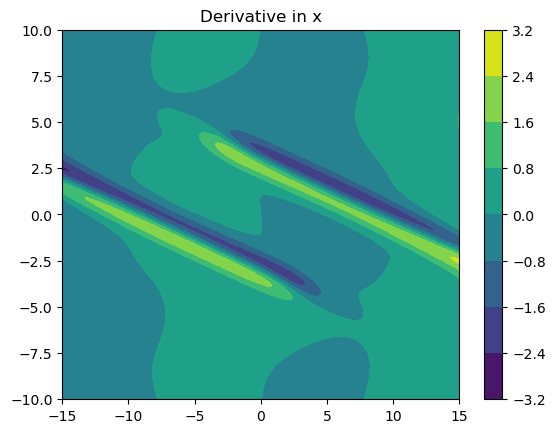

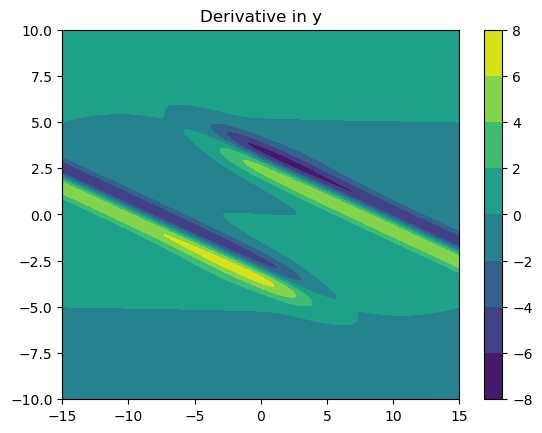

In [4]:
x = np.linspace(-15, 15, 1000)
y = np.linspace(-10, 10, 1000)

X, Y = np.meshgrid(x,y)

# original function
V = fzpot((X,Y))
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, V)
cbar = fig.colorbar(cs)
plt.title('Original function')
plt.show()

# derivative in x
partialV_partialx = fzpot_dx((X,Y))
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, partialV_partialx)
cbar = fig.colorbar(cs)
plt.title('Derivative in x')
plt.show()

# derivative in y
partialV_partialy = fzpot_dy((X,Y))
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, partialV_partialy)
cbar = fig.colorbar(cs)
plt.title('Derivative in y')
plt.show()

In [10]:
x_coord, y_coord = np.unravel_index(np.argmin(V), V.shape)
print(x[x_coord])
print(y[y_coord])

-7.642642642642643
-4.794794794794795


Q: Describe the general shape of the potential V (x, y) (minima, maxima, ridges). What are the coordinates of the minima?

A: The potential is symmetric along the XY-diagonal. It's a double well potential with a ridge / saddle in between. The approximate coordinates of the minima are (x=-7.64, y=-4.79) and (x=7.64, y=4.79)

### 1.2 Projections

Text(0.5, 1.0, 'Projection onto x')

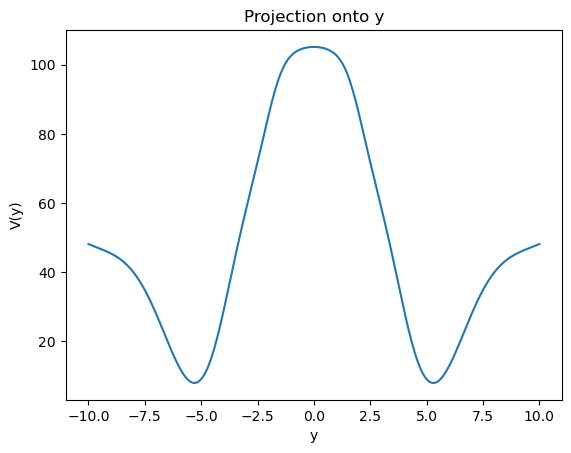

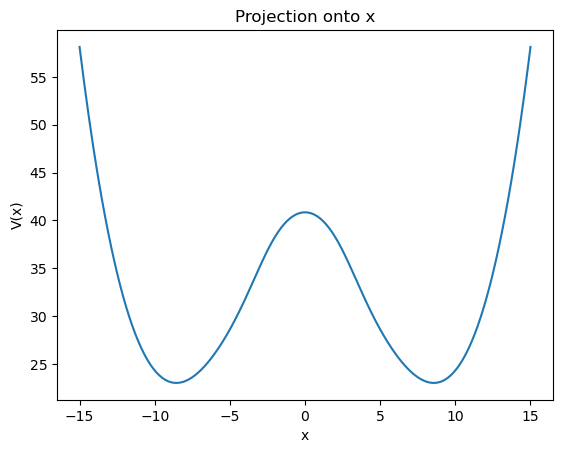

In [5]:
# integrate along x
y = np.linspace(-10, 10, 301)
V_y = []
for y_i in y:
    V_y.append(fzpot_intx(y_i))
plt.figure()
plt.plot(y, V_y)
plt.xlabel('y')
plt.ylabel('V(y)')
plt.title('Projection onto y')


# integrate along y
x = np.linspace(-15, 15, 301)
V_x = []
for x_i in x:
    V_x.append(fzpot_inty(x_i))
plt.figure()
plt.plot(x, V_x)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('Projection onto x')


Q: Plot V (x) and V (y) and describe the general shape of these functions. For each function, what would be an apparent transition state between the minima?


A: The energy barrier between the 2 minima in V(y) is much greater than that in V(x). The potential wall is high in V(x) making sure that the system is confined to the 2 wells. For V(x) and V(y), both minima are equally stable. The transition state has the coordinates (x = 0, y = 0).

## 2 Committor computation

### Function to perform an MD step using Langevin dynamics

In [4]:
from numpy.random import default_rng
import numpy as np

# MD step
rng = default_rng(23)


def mdstep(r, v, f, dt, lc):
    """MD step using Langevin dynamics

    Parameters
    ----------
    r:
        positions
    v:
        velocities
    f:
        forces
    dt:
        time step
    lc:
        coefficients for Langevin dynamics

    Return
    ---------
    r:
        updated positions
    v:
        updated velocities
    f:
        updated forces

    """

    # mass is set to 1.0 here, does not explicitly appear in the equations

    # langevin thermo, 1st half step
    v = lc[0] * v + lc[1] * rng.standard_normal(size=2)

    # Verlet part of MD step
    v = v + 0.5 * f * dt
    r = r + dt * v

    # compute forces for new position, dVdx and dVdy are the partial derivatives wrt x and y
    f = np.array([-fzpot_dx(r), -fzpot_dy(r)])

    v = v + 0.5 * f * dt

    # langevin thermo, 2nd half step
    v = lc[0] * v + lc[1] * rng.standard_normal(size=2)

    return r, v, f

### 2.1 MD simulations

Run two MD simulations, one starting in A and one in B for 10 × 10^4 steps. Compute the running average of β and report the value every 10^4 steps together with the current position and if the system is currently in A or B or in between.

In [5]:
m = 1.0
def Ekin(v: np.ndarray, m: float = m) -> np.ndarray:
    return 1/2 * m * np.sum(v**2)

def in_A(r: np.ndarray) -> bool:
    return r[0] < -4.0 and r[1] < -3.0

def in_B(r: np.ndarray) -> bool:
    return r[0] > 4.0 and r[1] > 3.0

# set time step and temperature
dt = 0.05
beta = 4.0

# initialize random number generator
rng = default_rng(27)

# initialize langevin parameters
lgamma = 1.0
c1 = np.exp(-lgamma * dt / 2.0)
c2 = np.sqrt((1.0 - (c1 * c1)) / beta)
lc = np.array([c1, c2])

# initialize position, velocities, and forces
## in A
r_A = np.array([-5.0, -5.0])
v_A = np.array(
    [
        np.sqrt(1.0 / beta) * rng.standard_normal(),
        np.sqrt(1.0 / beta) * rng.standard_normal(),
    ]
)
f_A = np.array([-fzpot_dx(r_A), -fzpot_dy(r_A)])

# rescale initial velocities to target temperature
scale = np.sqrt(1.0 / beta / Ekin(v_A))
v_A = v_A * scale
print(f"Starting in A: {in_A(r_A)}")
print(f"Initial beta = {1.0/Ekin(v_A):.3f}")

sum_Ekin = 0.0
count = 0
for i in range(10): 
    for _ in range(10000): 
        r, v, f = mdstep(r_A, v_A, f_A, dt, lc)
        count = count + 1
        sum_Ekin = sum_Ekin + Ekin(v)
    print(
        f"x = {r_A[0]:.3f}, y = {r_A[1]:.3f}, average beta = {1.0/(sum_Ekin/count):.3f}, A = {in_A(r)}, B = {in_B(r)}"
    )

Starting in A: True
Initial beta = 4.000
x = -5.000, y = -5.000, average beta = 4.108, A = True, B = False
x = -5.000, y = -5.000, average beta = 4.116, A = True, B = False
x = -5.000, y = -5.000, average beta = 4.114, A = True, B = False
x = -5.000, y = -5.000, average beta = 4.113, A = True, B = False
x = -5.000, y = -5.000, average beta = 4.115, A = True, B = False
x = -5.000, y = -5.000, average beta = 4.118, A = True, B = False
x = -5.000, y = -5.000, average beta = 4.118, A = True, B = False
x = -5.000, y = -5.000, average beta = 4.119, A = True, B = False
x = -5.000, y = -5.000, average beta = 4.122, A = True, B = False
x = -5.000, y = -5.000, average beta = 4.119, A = True, B = False


In [18]:
# initialize position, velocities, and forces
## in B
r_B = np.array([5.0, 5.0])
v_B = np.array(
    [
        np.sqrt(1.0 / beta) * rng.standard_normal(),
        np.sqrt(1.0 / beta) * rng.standard_normal(),
    ]
)
f_B = np.array([-fzpot_dx(r_B), -fzpot_dy(r_B)])

# rescale initial velocities to target temperature
scale = np.sqrt(1.0 / beta / Ekin(v_B))
v_B = v_B * scale
print(f"Starting in B: {in_B(r_B)}")
print(f"Initial beta = {1.0/Ekin(v_B):.3f}")

sum_Ekin = 0.0
count = 0
for i in range(10): 
    for _ in range(10000): 
        r, v, f = mdstep(r_B, v_B, f_B, dt, lc)
        count = count + 1
        sum_Ekin = sum_Ekin + Ekin(v)
    print(
        f"x = {r_B[0]:.3f}, y = {r_B[1]:.3f}, average beta = {1.0/(sum_Ekin/count):.3f}, A = {in_A(r)}, B = {in_B(r)}"
    )

Starting in B: True
Initial beta = 4.000
x = 5.000, y = 5.000, average beta = 3.908, A = False, B = True
x = 5.000, y = 5.000, average beta = 3.929, A = False, B = True
x = 5.000, y = 5.000, average beta = 3.928, A = False, B = True
x = 5.000, y = 5.000, average beta = 3.930, A = False, B = True
x = 5.000, y = 5.000, average beta = 3.929, A = False, B = True
x = 5.000, y = 5.000, average beta = 3.934, A = False, B = True
x = 5.000, y = 5.000, average beta = 3.931, A = False, B = True
x = 5.000, y = 5.000, average beta = 3.930, A = False, B = True
x = 5.000, y = 5.000, average beta = 3.928, A = False, B = True
x = 5.000, y = 5.000, average beta = 3.930, A = False, B = True


### 2.2 Committor distribution

#### 2.2.1 Projection on x

Starting configuration: 0, initial position: [0.         7.71404118]
Commitor p_B: 1.0
Starting configuration: 1, initial position: [ 0.         -7.08594361]
Commitor p_B: 0.0
Starting configuration: 2, initial position: [0.         1.59893884]
Commitor p_B: 0.65
Starting configuration: 3, initial position: [0.         3.74445808]
Commitor p_B: 1.0
Starting configuration: 4, initial position: [0.         3.96734489]
Commitor p_B: 1.0
Starting configuration: 5, initial position: [ 0.         -8.78747988]
Commitor p_B: 0.0
Starting configuration: 6, initial position: [ 0.         -9.46607982]
Commitor p_B: 0.0
Starting configuration: 7, initial position: [0.         5.53676488]
Commitor p_B: 1.0
Starting configuration: 8, initial position: [ 0.         -4.58655092]
Commitor p_B: 0.0
Starting configuration: 9, initial position: [ 0.         -4.06211793]
Commitor p_B: 0.0
Starting configuration: 10, initial position: [ 0.         -2.38456192]
Commitor p_B: 0.2
Starting configuration: 11, i

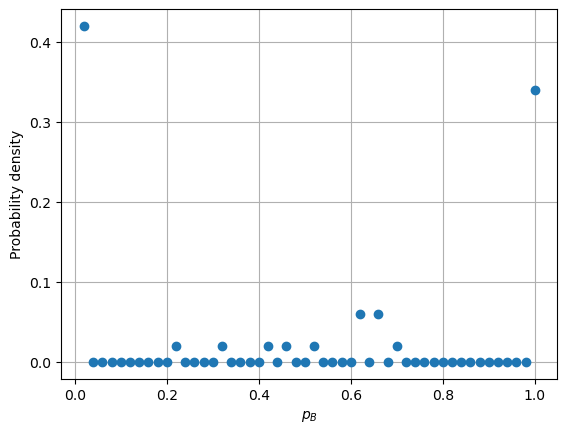

In [59]:
x = np.zeros(50)
y = np.random.uniform(-10, 10, size=50)
init_pos = np.column_stack((x,y))
p_B = np.zeros(50)

for i in range(50): # 50 starting configurations
    _p_B = np.zeros(20)
    print(f"Starting configuration: {i}, initial position: {init_pos[i]}")

    for j in range(20): # 20 MD simulation
        r = init_pos[i]
        v = np.array(
        [
            np.sqrt(1.0 / beta) * rng.standard_normal(),
            np.sqrt(1.0 / beta) * rng.standard_normal(),
        ]
    )
        f = np.array([-fzpot_dx(r), -fzpot_dy(r)])
        for _ in range(30000): # 30000 MD steps
            r, v, f = mdstep(r, v, f, dt, lc)
            if in_A(r) or in_B(r):
                break    
        if in_B(r):
            _p_B[j] = 1
    
    p_B[i] = np.mean(_p_B)
    print(f"Commitor p_B: {p_B[i]}")

plt.figure()
hist, bin_edges = np.histogram(p_B, bins=50, density=True)
plt.plot(bin_edges[1:], hist/np.sum(hist), 'o')
plt.xlabel(r'$p_B$')
plt.ylabel('Probability density')
plt.grid()
plt.show()

Q: From the committor distribution, does x = 0.0 denote a suitable transition state?

A: No, because a suitable transition state should have a peak at p_B = 0.5. Based on the commitor distribution, starting configurations with x = 0.0 can only end up in one of the stable states. They should have approximately equal probability to commit to one of the stable states.

#### 2.2.2 Projection on y

Starting configuration: 0, initial position: [14.69813654  0.        ]
Commitor p_B: 1.0
Starting configuration: 1, initial position: [0.54067491 0.        ]
Commitor p_B: 0.5
Starting configuration: 2, initial position: [0.77504574 0.        ]
Commitor p_B: 0.25
Starting configuration: 3, initial position: [-8.84315864  0.        ]
Commitor p_B: 0.75
Starting configuration: 4, initial position: [-3.76106462  0.        ]
Commitor p_B: 0.95
Starting configuration: 5, initial position: [-2.83102329  0.        ]
Commitor p_B: 0.8
Starting configuration: 6, initial position: [4.22221724 0.        ]
Commitor p_B: 0.0
Starting configuration: 7, initial position: [10.41614868  0.        ]
Commitor p_B: 1.0
Starting configuration: 8, initial position: [11.49360107  0.        ]
Commitor p_B: 1.0
Starting configuration: 9, initial position: [-3.0832623  0.       ]
Commitor p_B: 0.85
Starting configuration: 10, initial position: [10.74985372  0.        ]
Commitor p_B: 1.0
Starting configuration: 

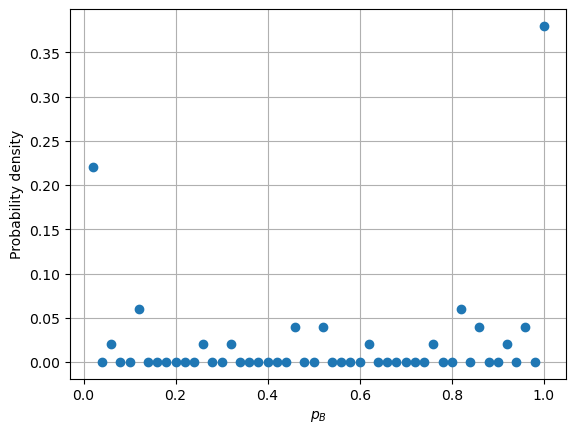

In [58]:
y = np.zeros(50)
x = np.random.uniform(-15, 15, size=50)
init_pos = np.column_stack((x,y))
p_B = np.zeros(50)

for i in range(50): # 50 starting configurations
    _p_B = np.zeros(20)
    print(f"Starting configuration: {i}, initial position: {init_pos[i]}")

    for j in range(20): # 20 MD simulation
        r = init_pos[i]
        v = np.array(
        [
            np.sqrt(1.0 / beta) * rng.standard_normal(),
            np.sqrt(1.0 / beta) * rng.standard_normal(),
        ]
    )
        f = np.array([-fzpot_dx(r), -fzpot_dy(r)])
        for _ in range(30000): # 30000 MD steps
            r, v, f = mdstep(r, v, f, dt, lc)
            if in_A(r) or in_B(r):
                break    
        if in_B(r):
            _p_B[j] = 1
    
    p_B[i] = np.mean(_p_B)
    print(f"Commitor p_B: {p_B[i]}")

plt.figure()
hist, bin_edges = np.histogram(p_B, bins=50, density=True)
plt.plot(bin_edges[1:], hist/np.sum(hist), 'o')
plt.xlabel(r'$p_B$')
plt.ylabel('Probability density')
plt.grid()
plt.show()

Q: From the committor distribution, does y = 0.0 denote a suitable transition state?

A: No, because a suitable transition state should have a peak at p_B = 0.5. Based on the commitor distribution, starting configurations with y = 0.0 can only end up in one of the stable states. They should have approximately equal probability to commit to one of the stable states.

#### 2.2.3 TS region in 2D

Starting configuration: 0, initial position: [ 0.10354516 -0.05928182]
Commitor p_B: 0.6
Starting configuration: 1, initial position: [0.01673695 0.16151483]
Commitor p_B: 0.5
Starting configuration: 2, initial position: [-0.07747092  0.11531705]
Commitor p_B: 0.7
Starting configuration: 3, initial position: [ 0.16013229 -0.07348908]
Commitor p_B: 0.45
Starting configuration: 4, initial position: [ 0.18706433 -0.05105254]
Commitor p_B: 0.6
Starting configuration: 5, initial position: [-0.1191327   0.16760725]
Commitor p_B: 0.5
Starting configuration: 6, initial position: [ 0.08291754 -0.19684501]
Commitor p_B: 0.5
Starting configuration: 7, initial position: [-0.18165251  0.09291341]
Commitor p_B: 0.75
Starting configuration: 8, initial position: [-0.09633759 -0.1748404 ]
Commitor p_B: 0.6
Starting configuration: 9, initial position: [0.07741192 0.02656803]
Commitor p_B: 0.4
Starting configuration: 10, initial position: [-0.11555996  0.12990719]
Commitor p_B: 0.45
Starting configuratio

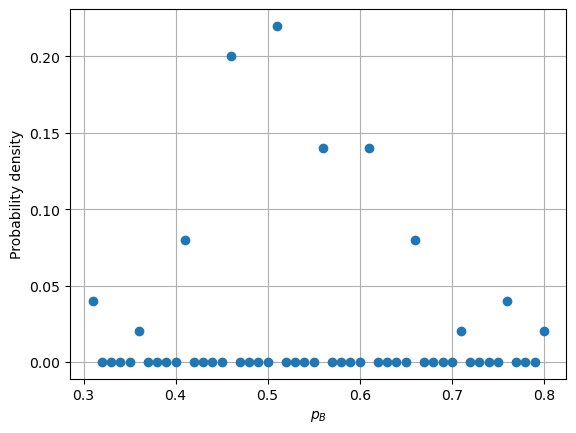

In [60]:
x = np.random.uniform(-0.2, 0.2, size=50)
y = np.random.uniform(-0.2, 0.2, size=50)

init_pos = np.column_stack((x,y))
p_B = np.zeros(50)

for i in range(50): # 50 starting configurations
    _p_B = np.zeros(20)
    print(f"Starting configuration: {i}, initial position: {init_pos[i]}")

    for j in range(20): # 20 MD simulation
        r = init_pos[i]
        v = np.array(
        [
            np.sqrt(1.0 / beta) * rng.standard_normal(),
            np.sqrt(1.0 / beta) * rng.standard_normal(),
        ]
    )
        f = np.array([-fzpot_dx(r), -fzpot_dy(r)])
        for _ in range(30000): # 30000 MD steps
            r, v, f = mdstep(r, v, f, dt, lc)
            if in_A(r) or in_B(r):
                break    
        if in_B(r):
            _p_B[j] = 1
    
    p_B[i] = np.mean(_p_B)
    print(f"Commitor p_B: {p_B[i]}")

plt.figure()
hist, bin_edges = np.histogram(p_B, bins=50, density=True)
plt.plot(bin_edges[1:], hist/np.sum(hist), 'o')
plt.xlabel(r'$p_B$')
plt.ylabel('Probability density')
plt.grid()
plt.show()

Q: From the committor distribution, does x = 0.0 and y = 0.0 denote a suitable transition state?

A: Yes, because a suitable transition state has a peak around p_B = 0.5. Based on the commitor distribution, starting configurations around x = 0.0 and y = 0.0 has about 50% probability of moving towards B. 